In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [13]:
train=pd.read_csv('data/train.csv')

In [3]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
train.shape

(19579, 3)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
id        19579 non-null object
text      19579 non-null object
author    19579 non-null object
dtypes: object(3)
memory usage: 459.0+ KB


In [8]:
train.columns


Index(['id', 'text', 'author'], dtype='object')

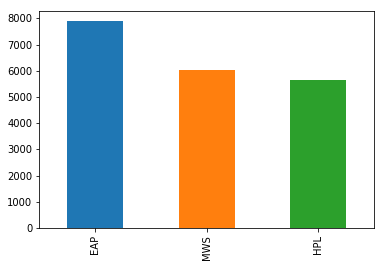

In [15]:
train.author.value_counts().plot(kind='bar')


In [18]:
z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}
data = [go.Bar(
            x = train.author.map(z).unique(),
            y = train.author.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = train.author.value_counts().values
                        ),
            text='Text entries attributed to Author'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [23]:
z={'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}
data=[go.Bar(
        x=train.author.unique(),
        y=train.author.value_counts().values,
    marker=dict(colorscale='Jet',color=train.author.value_counts().values),
    text='Text entries attributed to Author'
)]

layout=go.Layout(title='Target variable distribution')

fig=go.Figure(data=data,layout=layout)

py.iplot(fig,filename='basic-bar')

In [24]:
all_words=train['text'].str.split(expand=True).unstack().value_counts()

In [25]:
all_words

the               33296
of                20851
and               17059
to                12615
I                 10382
a                 10359
in                 8787
was                6440
that               5988
my                 5037
had                4324
with               4207
his                3802
as                 3528
he                 3422
it                 3247
for                3227
which              3203
not                3048
at                 2925
from               2758
by                 2725
is                 2533
but                2521
on                 2285
be                 2268
The                2121
were               2118
have               2089
me                 2015
                  ...  
rise;                 1
recompence,           1
converge              1
display,              1
authors."             1
tails                 1
blossoming            1
vagabond"             1
compassionated        1
reserved.             1
disillusion     

In [36]:
data=[go.Bar(
        x=all_words.index.values[2:50],
        y=all_words.values[2:50],
    marker=dict(colorscale='Jet',color=all_words),
    text='word counts'
)]
layout=go.Layout(title='Top 50 uncleaned word frequency')

fig=go.Figure(data=data,layout=layout)
py.iplot(fig,filename='basic-bar')

In [ ]:
words=train['text'].str.split(expand=True).value_counts()